In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
TODAY = datetime.datetime.now()
%matplotlib inline

In [12]:
temp_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"

prev_day_url = temp_url + "0" + str(TODAY.month) + '-'+ str(TODAY.day-2) + '-' + str(TODAY.year) + '.csv'
prev_day_data = pd.read_csv(prev_day_url)

day_before_url = temp_url + "0" + str(TODAY.month) + '-'+ str(TODAY.day-3) + '-' + str(TODAY.year) + '.csv'
day_before_data = pd.read_csv(day_before_url)

In [3]:
prev_day_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-01-22 04:21:13,33.93911,67.709953,159516,7390,NaN,NaN,Afghanistan,409.768297,4.632764
1,NaN,NaN,NaN,Albania,2022-01-22 04:21:13,41.15330,20.168300,244182,3292,NaN,NaN,Albania,8485.023282,1.348175
2,NaN,NaN,NaN,Algeria,2022-01-22 04:21:13,28.03390,1.659600,232325,6468,NaN,NaN,Algeria,529.804958,2.784031
3,NaN,NaN,NaN,Andorra,2022-01-22 04:21:13,42.50630,1.521800,33025,144,NaN,NaN,Andorra,42742.509545,0.436033
4,NaN,NaN,NaN,Angola,2022-01-22 04:21:13,-11.20270,17.873900,95676,1884,NaN,NaN,Angola,291.106979,1.969146


In [4]:
day_before_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-01-21 04:21:09,33.93911,67.709953,159303,7386,NaN,NaN,Afghanistan,409.221138,4.636448
1,NaN,NaN,NaN,Albania,2022-01-21 04:21:09,41.15330,20.168300,241512,3286,NaN,NaN,Albania,8392.244075,1.360595
2,NaN,NaN,NaN,Algeria,2022-01-21 04:21:09,28.03390,1.659600,230470,6453,NaN,NaN,Algeria,525.574728,2.799931
3,NaN,NaN,NaN,Andorra,2022-01-21 04:21:09,42.50630,1.521800,32201,144,NaN,NaN,Andorra,41676.049958,0.447191
4,NaN,NaN,NaN,Angola,2022-01-21 04:21:09,-11.20270,17.873900,95220,1881,NaN,NaN,Angola,289.719539,1.975425


In [13]:
# print(prev_day_data[prev_day_data['Country_Region'] == 'India'].head(100))
prev_day_data = prev_day_data[['Country_Region', 'Confirmed', 'Deaths']]

In [14]:
prev_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  4006 non-null   object
 1   Confirmed       4006 non-null   int64 
 2   Deaths          4006 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 94.0+ KB


In [15]:
prev_day_data = prev_day_data.groupby(['Country_Region']).sum()

In [16]:
prev_day_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  196 non-null    int64
 1   Deaths     196 non-null    int64
dtypes: int64(2)
memory usage: 4.6+ KB


In [9]:
# prev_day_data['Country_Region'] = prev_day_data.index

In [17]:
prev_day_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  196 non-null    int64
 1   Deaths     196 non-null    int64
dtypes: int64(2)
memory usage: 4.6+ KB


In [18]:
prev_day_data.reset_index(level = 0, inplace=True)

In [19]:
prev_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  196 non-null    object
 1   Confirmed       196 non-null    int64 
 2   Deaths          196 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.7+ KB


In [20]:
prev_day_data.head()

,Country_Region,Confirmed,Deaths
0,Afghanistan,159516,7390
1,Albania,244182,3292
2,Algeria,232325,6468
3,Andorra,33025,144
4,Angola,95676,1884


In [21]:
country_continent = pd.read_csv('Continents.csv', encoding='ISO-8859-1')

In [22]:
import chardet
file="Continents.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [23]:
# country_continent=country_continent[["country","continent"]]

KeyError: "None of [Index(['country', 'continent'], dtype='object')] are in the [columns]"

In [24]:
# country_continent.rename(columns={"country":"Country_Region","continent":"Continent"},inplace= True)
country_continent

,Unnamed: 0,Country_Region,Continent
0,0,Afghanistan,Asia
1,1,Albania,Europe
2,2,Algeria,Africa
3,3,Andorra,Europe
4,4,Angola,Africa
...,...,...,...
185,186,Vietnam,Asia
186,187,West Bank and Gaza,Asia
187,189,Yemen,Asia
188,190,Zambia,Africa


In [26]:
df=pd.merge(prev_day_data,country_continent,on='Country_Region',how='left')

In [27]:
df[df.isnull().any(axis=1)]

,Country_Region,Confirmed,Deaths,Unnamed: 0,Continent
48,Diamond Princess,712,13,NaN,NaN
56,Eritrea,9192,90,NaN,NaN
75,Holy See,29,0,NaN,NaN
105,MS Zaandam,9,2,NaN,NaN
167,Summer Olympics 2020,865,0,NaN,NaN
178,Tonga,1,0,NaN,NaN


In [28]:
df.drop("Unnamed: 0",inplace = True,axis=1)

In [29]:
df.dropna(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  196 non-null    object
 1   Confirmed       196 non-null    int64 
 2   Deaths          196 non-null    int64 
 3   Continent       169 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.7+ KB


In [50]:
df.dropna(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 195
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  190 non-null    object
 1   Confirmed       190 non-null    int64 
 2   Deaths          190 non-null    int64 
 3   Continent       190 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.4+ KB


In [54]:
cont_data = df.groupby(['Continent']).sum()

In [55]:
cont_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Africa to Oceania
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  5 non-null      int64
 1   Deaths     5 non-null      int64
dtypes: int64(2)
memory usage: 120.0+ bytes


In [56]:
cont_data.iloc[0]

Confirmed    10235058
Deaths         230511
Name: Africa, dtype: int64

In [60]:
confirmed=np.array(cont_data["Confirmed"]).transpose()
deaths=np.array(cont_data["Deaths"]).transpose()

In [61]:
continents=["Africa","Americas","Asia","Europe","Oceania"]
continents = [*continents, continents[0]]


deaths = [*deaths, deaths[0]]
confirmed = [*confirmed, confirmed[0]]

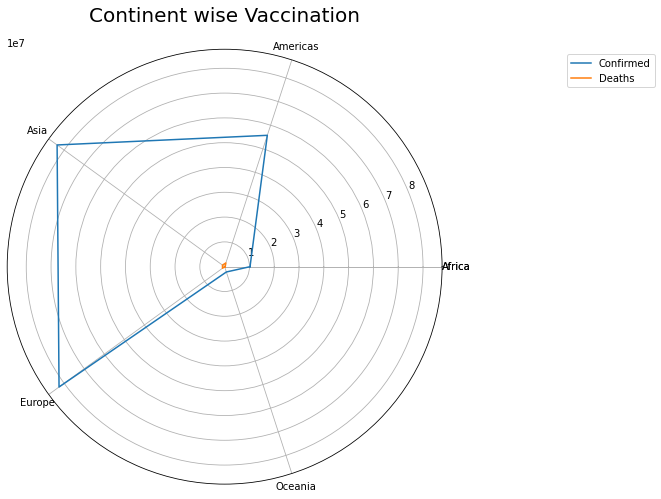

In [68]:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(confirmed))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, confirmed, label='Confirmed')
plt.plot(label_loc, deaths, label='Deaths')
plt.title('Continent wise Vaccination', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=continents)
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.savefig('comparison.jpg')

In [64]:
world_confirmed = cont_data['Confirmed'].sum()
world_deaths = cont_data['Deaths'].sum()
world_recovery_recovered = world_confirmed - world_deaths

In [66]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

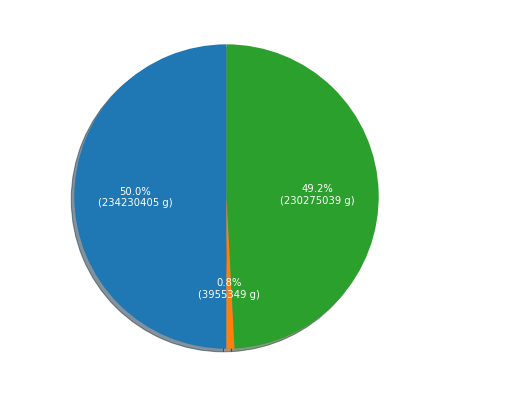

In [69]:
label=["Confirmed","Deaths","Recovered/Recovering"]
data=[world_confirmed,world_deaths,world_recovery_recovered]
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  
                                  labels = label,
                                  shadow = True,
                                  
                                  startangle = 90,
                                 
                                  textprops = dict(color ="white"))
plt.savefig('compositional.jpg')